In [1]:
!git clone https://github.com/ultralytics/yolov5  # clone
%cd yolov5
%pip install -qr requirements.txt  # install
import os
import torch
import cv2
import numpy as np
from os import walk
from os.path import join
from datetime import datetime
from yolov5 import utils
display = utils.notebook_init()  # checks
import matplotlib.pyplot as plt
from google.colab import drive
from google.colab.patches import cv2_imshow
drive.mount('/content/gdrive')

YOLOv5 🚀 v6.1-21-ge6e36aa torch 1.10.0+cu111 CUDA:0 (Tesla K80, 11441MiB)


Setup complete ✅ (2 CPUs, 12.7 GB RAM, 42.1/78.2 GB disk)
Mounted at /content/gdrive


In [2]:
'''
This sample code takes '/content/gdrive/MyDrive/Yolov5_HW1' as the folder path to store HW1_material.zip,
If the path used below is not your Google Drive path, please replace it with the path where you put HW1_material.zip
'''
yourPath = '/content/gdrive/MyDrive/Yolov5_HW1'

After unzip, you will see HW1_material on the left. (/content/yolov5/HW1_material)

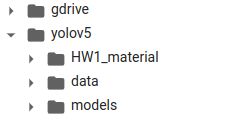

In [3]:
'''
Get the required dataset 
'''
zipPath = os.path.join(yourPath, 'HW1_material.zip')
!unzip $zipPath

Archive:  /content/gdrive/MyDrive/Yolov5_HW1/HW1_material.zip
   creating: HW1_material/
   creating: HW1_material/detect/
  inflating: HW1_material/detect/detectData.txt  
  inflating: HW1_material/detect/video.gif  
   creating: HW1_material/datasets/
   creating: HW1_material/datasets/hw1/
   creating: HW1_material/datasets/hw1/images/
   creating: HW1_material/datasets/hw1/images/train/
  inflating: HW1_material/datasets/hw1/images/train/tc_1.png  
  inflating: HW1_material/datasets/hw1/images/train/tc_2.png  
  inflating: HW1_material/datasets/hw1/images/train/tc_3.png  
  inflating: HW1_material/datasets/hw1/images/train/tc_4.png  
  inflating: HW1_material/datasets/hw1/images/train/tc_5.png  
  inflating: HW1_material/datasets/hw1/images/train/tc_6.png  
  inflating: HW1_material/datasets/hw1/images/train/tc_7.png  
  inflating: HW1_material/datasets/hw1/images/train/tc_8.png  
  inflating: HW1_material/datasets/hw1/images/train/tc_9.png  
  inflating: HW1_material/datasets/hw1/

### Fine-tune on our training datasets，You can adjust the parameters, about the parameters you can detail [train.py](https://github.com/ultralytics/yolov5/blob/master/train.py)

After fine-tuning, you can see the training results in /content/yolov5/runs/train/exp
（there are many things to discuss, you can download them if you want to discuss）

---

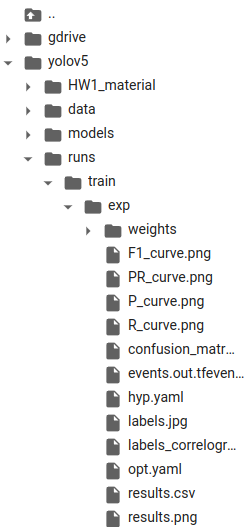


In [6]:
'''
Fine-tune on our training datasets
'''
!python train.py --img 36 --batch 16 --epochs 10 --data HW1_material/hw1.yaml --weights yolov5s.pt --cache --exist-ok

train: weights=yolov5s.pt, cfg=, data=HW1_material/hw1.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=10, batch_size=16, imgsz=36, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=True, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.1-21-ge6e36aa torch 1.10.0+cu111 CUDA:0 (Tesla K80, 11441MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, degrees=0.0, translate=0.1, sc

###After copy, you will see the model in your google drvie
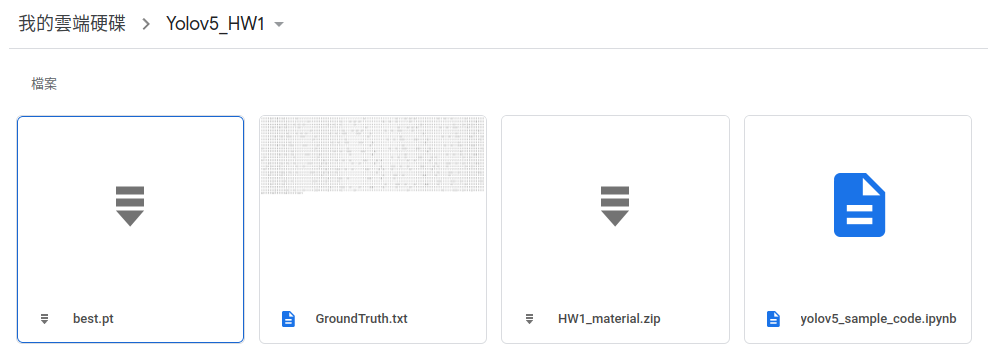

In [7]:
'''
Copy the best model parameters to your own drive
'''
savePath = yourPath + '/' 
!cp '/content/yolov5/runs/train/exp/weights/best.pt' $savePath

In [8]:
'''
Test on training dataset with the best model trained, you try another conf value (confidence : 0~1, hint: refer to /content/yolov5/runs/train/exp/F1_curve.png)
'''
modelPath = os.path.join(yourPath, 'best.pt')
!python detect.py --weights $modelPath --img 36 --conf 0.4 --save-txt --exist-ok --source '/content/yolov5/HW1_material/train/car/'
!python detect.py --weights $modelPath --img 36 --conf 0.4 --save-txt --exist-ok --source '/content/yolov5/HW1_material/train/non-car'

detect: weights=['/content/gdrive/MyDrive/Yolov5_HW1/best.pt'], source=/content/yolov5/HW1_material/train/car/, data=data/coco128.yaml, imgsz=[36, 36], conf_thres=0.4, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=True, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.1-21-ge6e36aa torch 1.10.0+cu111 CUDA:0 (Tesla K80, 11441MiB)

Fusing layers... 
Model Summary: 213 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
image 1/300 /content/yolov5/HW1_material/train/car/tc_1.png: 32x64 1 parking, Done. (0.022s)
image 2/300 /content/yolov5/HW1_material/train/car/tc_10.png: 32x64 1 parking, Done. (0.022s)
image 3/300 /content/yolov5/HW1_material/train/car/tc_100.png: 32x64 1 parking, Done. (0.022s)
image 4/300 /content/yolov5/HW1_material/train/car/tc_101.png: 32

In [9]:
'''
Calculate yolov5 performance
'''
def loadAns(dataPath):
    pos = os.path.join(dataPath, 'car')
    neg = os.path.join(dataPath, 'non-car')
    Answer = []
    for f in os.listdir(pos):
        if not os.path.isdir(f):
            Answer.append((os.path.join(pos, f), 1))
    for f in os.listdir(neg):
        if not os.path.isdir(f):
            Answer.append((os.path.join(neg, f), 0))
    return Answer

Answer = loadAns('/content/yolov5/HW1_material/train/') 

all_negatives, all_positives = 0, 0
true_negatives, false_negatives = 0, 0
true_positives, false_positives = 0, 0

for x, y in Answer:

    exec_path = "'" + x + "'"
    img_filename = x.split('/')[-1]
    img_filename = img_filename.split('.')[0]
    txtpath = '/content/yolov5/runs/detect/exp/labels/' + img_filename + '.txt'

    if y == 1:
        all_positives += 1
    else:
        all_negatives += 1

    try:
        with open(txtpath, 'r') as f:
            n = len(f.readlines())
        if n > 0:
            prediction = 1
        else:
            prediction = 0
    except:
        prediction = 0

    if prediction == 1:
        if y == 1:
            true_positives += 1
        else:
            false_positives += 1
    else:
        if y == 1:
            false_negatives += 1
        else:
            true_negatives += 1

correct = true_positives + true_negatives
print("False Positive Rate: %d/%d (%f)" % (false_positives, all_negatives, false_positives/all_negatives))
print("False Negative Rate: %d/%d (%f)" % (false_negatives, all_positives, false_negatives/all_positives))
print("Training Accuracy: %d/%d (%f)" % (correct, len(Answer), correct/len(Answer)))

False Positive Rate: 37/300 (0.123333)
False Negative Rate: 2/300 (0.006667)
Training Accuracy: 561/600 (0.935000)


In [10]:
'''
Delete detect folder for new detection
'''
!rm -r '/content/yolov5/runs/detect'

In [11]:
'''
Test on testing datasets with the best model trained
'''
modelPath = os.path.join(yourPath, 'best.pt')
!python detect.py --weights $modelPath --img 36 --conf 0.4 --save-txt --exist-ok --source '/content/yolov5/HW1_material/test/car/'
!python detect.py --weights $modelPath --img 36 --conf 0.4 --save-txt --exist-ok --source '/content/yolov5/HW1_material/test/non-car'

detect: weights=['/content/gdrive/MyDrive/Yolov5_HW1/best.pt'], source=/content/yolov5/HW1_material/test/car/, data=data/coco128.yaml, imgsz=[36, 36], conf_thres=0.4, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=True, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.1-21-ge6e36aa torch 1.10.0+cu111 CUDA:0 (Tesla K80, 11441MiB)

Fusing layers... 
Model Summary: 213 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
image 1/300 /content/yolov5/HW1_material/test/car/vc_1.png: 32x64 1 parking, Done. (0.023s)
image 2/300 /content/yolov5/HW1_material/test/car/vc_10.png: 32x64 1 parking, Done. (0.022s)
image 3/300 /content/yolov5/HW1_material/test/car/vc_100.png: 32x64 1 parking, Done. (0.022s)
image 4/300 /content/yolov5/HW1_material/test/car/vc_101.png: 32x64 1

In [12]:
'''
Calculate yolov5 performance
'''

def loadAns(dataPath):
    pos = os.path.join(dataPath, 'car')
    neg = os.path.join(dataPath, 'non-car')
    Answer = []
    for f in os.listdir(pos):
        if not os.path.isdir(f):
            Answer.append((os.path.join(pos, f), 1))
    for f in os.listdir(neg):
        if not os.path.isdir(f):
            Answer.append((os.path.join(neg, f), 0))
    return Answer

Answer = loadAns('/content/yolov5/HW1_material/test/') 

all_negatives, all_positives = 0, 0
true_negatives, false_negatives = 0, 0
true_positives, false_positives = 0, 0

for x, y in Answer:

    exec_path = "'" + x + "'"
    img_filename = x.split('/')[-1]
    img_filename = img_filename.split('.')[0]
    txtpath = '/content/yolov5/runs/detect/exp/labels/' + img_filename + '.txt'

    if y == 1:
        all_positives += 1
    else:
        all_negatives += 1

    try:
        with open(txtpath, 'r') as f:
            n = len(f.readlines())
        if n > 0:
            prediction = 1
    except:
        prediction = 0

    if prediction == 1:
        if y == 1:
            true_positives += 1
        else:
            false_positives += 1
    else:
        if y == 1:
            false_negatives += 1
        else:
            true_negatives += 1

correct = true_positives + true_negatives
print("False Positive Rate: %d/%d (%f)" % (false_positives, all_negatives, false_positives/all_negatives))
print("False Negative Rate: %d/%d (%f)" % (false_negatives, all_positives, false_negatives/all_positives))
print("Testing Accuracy: %d/%d (%f)" % (correct, len(Answer), correct/len(Answer)))

False Positive Rate: 21/300 (0.070000)
False Negative Rate: 0/300 (0.000000)
Testing Accuracy: 579/600 (0.965000)


###This part is similar to Part 4, you can follow the hint of command to finish codes between # Begin your code and # End your code

---


After execution, You will see **Yolov5_pred.txt** in your google drive 
Please upload **Adaboost_pred.txt and GroundTruth.txt** to your drive, then draw a scatter plot/line graph to show the temporal parking slots occupation and accuracy by executing following code.
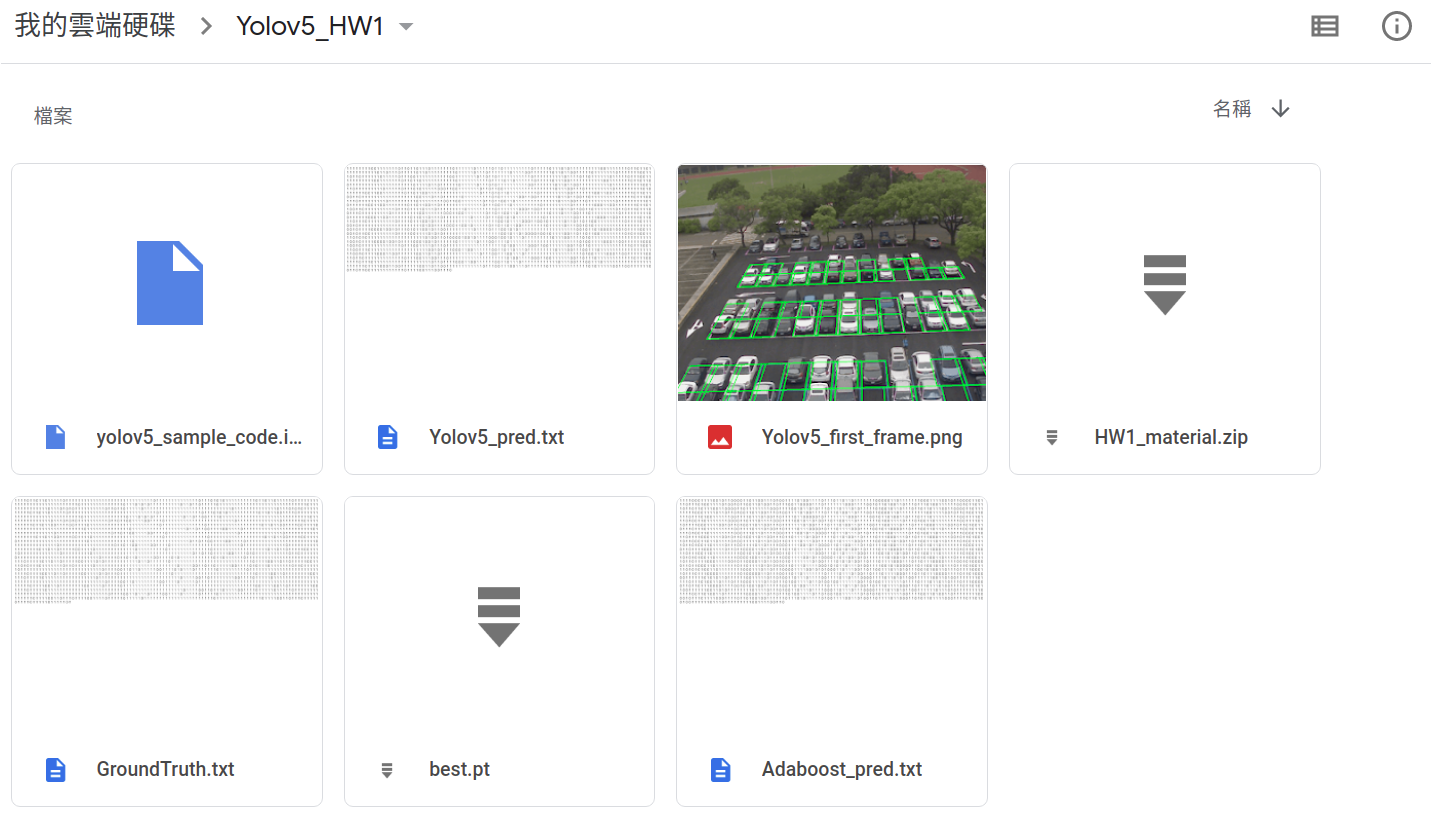

In [ ]:
'''
Same as part 4, just replace clf.classify() with yolov5_func.classify() and you don't need to transfer each parking space images to grayscale images (just resize to 36 x 16)
Save a txt file (Yolov5_pred.txt) of temporal parking slots occupation
(Total execution time is about 30 mins)

The explanation of yolov5_func.classify():
Parameters:
    parking_space_image: parking space image of the frame (you need to resize to 36 x 16)
    weight_path: The path of the trained model. (e.g., '/content/gdrive/MyDrive/Colab Notebooks/best.pt')
    confidence_threshold: Only show predictions whose probability exceeds confidence_threshold.
    image_size: e.g., (36, 16)
Returns:
    1 if your model determines that this image has a car
    0 otherwise
Usage:
    prediction = yolov5_func.classify(parking_space_image, weight_path, confidence_threshold, image_size)
'''

import HW1_material.yolov5_func

def crop(x1, y1, x2, y2, x3, y3, x4, y4, img) :
    """
    This function ouput the specified area (360 x 160 parking space image) of the input frame according to the input of four xy coordinates

      Parameters:
        (x1, y1, x2, y2, x3, y3, x4, y4, frame)
        
        (x1, y1) is the lower left corner of the specified area
        (x2, y2) is the lower right corner of the specified area
        (x3, y3) is the upper left corner of the specified area
        (x4, y4) is the upper right corner of the specified area
        frame is the frame you want to get it's parking space image
        
      Returns:
        parking_space_image (image size = 360 x 160)
      usage:
        parking_space_image = utils.crop(x1, y1, x2, y2, x3, y3, x4, y4, img)
    """
    left_front = (x1, y1)
    right_front = (x2, y2)
    left_bottom = (x3, y3)
    right_bottom = (x4, y4)
    src_pts = np.array([left_front, right_front, left_bottom, right_bottom]).astype(np.float32)
    dst_pts = np.array([[0, 0], [0, 160], [360, 0], [360, 160]]).astype(np.float32)
    projective_matrix = cv2.getPerspectiveTransform(src_pts, dst_pts)
    croped = cv2.warpPerspective(img, projective_matrix, (360,160))
    return croped

weight_path = os.path.join(yourPath, 'best.pt')
img_save_path = os.path.join(yourPath, 'Yolov5_first_frame.png')
txt_save_path = os.path.join(yourPath, 'Yolov5_pred.txt')
confidence_threshold = 0.4 # you can adjust by yourself
# Begin your code (Part 5)

# End your code (Part 5)

Streaming output truncated to the last 5000 lines.
YOLOv5 🚀 v6.1-14-g8a66eba torch 1.10.0+cu111 CPU

Fusing layers... 
Model Summary: 213 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 /content/yolov5/data/images/bus.jpg: 32x32 1 parking, Done. (0.014s)
Speed: 0.1ms pre-process, 13.6ms inference, 0.6ms NMS per image at shape (1, 3, 64, 32)
Results saved to runs/detect/exp
YOLOv5 🚀 v6.1-14-g8a66eba torch 1.10.0+cu111 CPU

Fusing layers... 
Model Summary: 213 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 /content/yolov5/data/images/bus.jpg: 32x32 1 parking, Done. (0.014s)
Speed: 0.1ms pre-process, 14.4ms inference, 0.6ms NMS per image at shape (1, 3, 64, 32)
Results saved to runs/detect/exp
YOLOv5 🚀 v6.1-14-g8a66eba torch 1.10.0+cu111 CPU

Fusing layers... 
Model Summary: 213 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 /content/yolov5/data/images/bus.jpg: 32x32 1 parking, Done. (0.014s)
Speed: 0.2ms pre-process, 14.1ms inference, 0.6ms 

## Draw Some Plots

In [ ]:
## groundtruth
gt = pd.read_csv(yourPath+'/GroundTruth.txt', sep=" ", header=None)

## adaboost prediction
adaboost = pd.read_csv(yourPath+'/Adaboost_pred.txt', sep=" ", header=None)

## yolo prediction
yolo = pd.read_csv(yourPath+'/Yolov5_pred.txt', sep=" ", header=None)

### Parking Slots Occupation

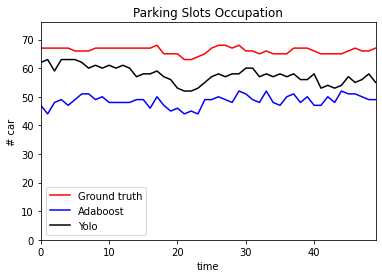

In [ ]:
gt_sum = gt.sum(axis = 1)
adaboost_sum = adaboost.sum(axis = 1)
yolo_sum = yolo.sum(axis = 1)

plt.figure()
plt.plot(gt_sum, label='Ground truth', color='red')
plt.plot(adaboost_sum, label='Adaboost', color='blue')
plt.plot(yolo_sum, label='Yolo', color='black')

plt.xlabel('time')
plt.ylabel('# car')
plt.xlim((0,49))
plt.ylim((0,76))
plt.title('Parking Slots Occupation')
plt.legend()
plt.savefig(yourPath + '/Parking_Slots_Occupation.png')
plt.show()

### Accuracy

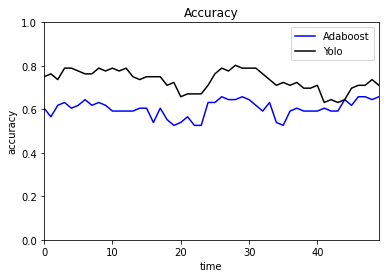

In [ ]:
def get_accuracy(df):
  return np.sum(np.equal(gt, df), axis=1) / gt.shape[1]

adaboost_acc = get_accuracy(adaboost)
yolo_acc = get_accuracy(yolo)

plt.figure()
plt.plot(adaboost_acc, label='Adaboost', color='blue')
plt.plot(yolo_acc, label='Yolo', color='black')

plt.xlabel('time')
plt.ylabel('accuracy')
plt.xlim((0,49))
plt.ylim((0,1))
plt.title('Accuracy')
plt.legend()
plt.savefig(yourPath + '/Accuracy.png')
plt.show()